In [876]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [877]:
#Data Import
real_data=pd.read_csv(join('data','national_fire_information_2017.csv'), encoding='CP949')
real_data.head(2) #table로 보여주어 직관적이다.

C:\Users\Una\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (122,129,136,165,182,195) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,연번,조사서번호,사망,부상,인명피해(명)소계,재산피해소계,시도본부,소방서,119안전센터,119지역대,...,지번동,지번리,출동소요시,출동소요분,출동소요초,그을음면적,차량발화지점,위험물_가스제조소등_완공일,위험물_가스제조소등_발화지점,선박항공기구분
0,1,'170101044118025,0,0,0,13391,서울소방재난본부,강남소방서,영동119안전센터,NaN,...,논현1동,NaN,0,6,29,40.0,NaN,NaN,NaN,NaN
1,2,'170101010314566,0,0,0,195,경북소방본부,문경소방서,점촌119안전센터,NaN,...,점촌3동,NaN,0,9,14,80.0,NaN,NaN,NaN,NaN


## data preprocessing

In [1021]:
#dp = real_data[['재산피해소계','출동소요시간', '화재진압시간', '소방서거리(㎞)', '소실면적(㎡)','온도(℃)','습도','풍속','그을음면적']]
dp = real_data[['재산피해소계','출동소요시간', '화재진압시간', '소실면적(㎡)','그을음면적','온도(℃)','습도','풍속']]
dp.head(5)

,재산피해소계,출동소요시간,화재진압시간,소실면적(㎡),그을음면적,온도(℃),습도,풍속
0,13391,0:06:29,0:15:00,10.0,40.0,0.0,0.0,NONE
1,195,0:09:14,0:04:03,0.0,80.0,0.0,0.0,NONE
2,22,0:09:26,0:49:05,NaN,NaN,3.0,79.0,0~4 m/s
3,1,0:06:50,0:00:02,0.0,0.0,-1.4,99.0,0~4 m/s
4,966,0:01:55,0:00:00,7.0,43.0,0.6,99.0,0~4 m/s


In [1022]:
dp['재산피해소계'].value_counts()

0        3919
110       560
11        502
55        483
50        323
         ... 
98077       1
38688       1
7985        1
3891        1
2047        1
Name: 재산피해소계, Length: 10765, dtype: int64

In [1023]:
a = dp.loc[dp['재산피해소계']<= 1000000, '재산피해소계']
print(a.shape[0])

b = dp.loc[(dp['재산피해소계']> 1000000) & (dp['재산피해소계']<= 2000000), '재산피해소계']
print(b.shape[0])

c = dp.loc[(dp['재산피해소계']> 2000000) & (dp['재산피해소계']<= 3000000), '재산피해소계']
print(c.shape[0])

d = dp.loc[(dp['재산피해소계']> 3000000) & (dp['재산피해소계']<= 4000000), '재산피해소계']
print(d.shape[0])

e = dp.loc[(dp['재산피해소계']> 4000000) & (dp['재산피해소계']<= 5000000), '재산피해소계']
print(e.shape[0])

f = dp.loc[(dp['재산피해소계']> 5000000) & (dp['재산피해소계']<= 6000000), '재산피해소계']
print(f.shape[0])

g = dp.loc[(dp['재산피해소계']> 6000000) & (dp['재산피해소계']<= 7000000), '재산피해소계']
print(g.shape[0])

h = dp.loc[(dp['재산피해소계']> 7000000) & (dp['재산피해소계']<= 8000000), '재산피해소계']
print(h.shape[0])

i = dp.loc[(dp['재산피해소계']> 8000000), '재산피해소계']
print(i.shape[0])

44110
47
10
4
3
0
2
0
2


In [1024]:
b = dp.loc[(dp['재산피해소계']> 1000000) & (dp['재산피해소계']<= 1100000), '재산피해소계']
print(b.shape[0])

c = dp.loc[(dp['재산피해소계']> 1300000) & (dp['재산피해소계']<= 2000000), '재산피해소계']
print(c.shape[0])

7
28


In [1046]:
dp['재산피해소계'].sort_values()

11600          0
11121          0
33509          0
11126          0
23925          0
          ...   
15772    4501168
32184    6070382
18080    6693391
11654    8285507
4479     8323780
Name: 재산피해소계, Length: 44178, dtype: int64

In [1047]:
print(dp.isnull().sum())

재산피해소계         0
출동소요시간         0
화재진압시간         0
소실면적(㎡)    13492
그을음면적      15802
온도(℃)          1
습도             0
풍속             0
dtype: int64


In [1048]:
dp1 = dp.loc[(dp['재산피해소계']<= 1100000)]
#dp1=dp
dp1.head(5)

,재산피해소계,출동소요시간,화재진압시간,소실면적(㎡),그을음면적,온도(℃),습도,풍속
0,13391,0:06:29,0:15:00,10.0,40.0,0.0,0.0,NONE
1,195,0:09:14,0:04:03,0.0,80.0,0.0,0.0,NONE
2,22,0:09:26,0:49:05,NaN,NaN,3.0,79.0,0~4 m/s
3,1,0:06:50,0:00:02,0.0,0.0,-1.4,99.0,0~4 m/s
4,966,0:01:55,0:00:00,7.0,43.0,0.6,99.0,0~4 m/s


In [1049]:
print(dp1.isnull().sum())

재산피해소계         0
출동소요시간         0
화재진압시간         0
소실면적(㎡)    13489
그을음면적      15797
온도(℃)          1
습도             0
풍속             0
dtype: int64


In [1050]:
#온도 NAN값
dp1 = dp1.dropna(subset=['온도(℃)'])

dp1['습도(%)'] = pd.to_numeric(dp1['습도'])/100
del dp1['습도']

In [1051]:
#소실면적 NAN값
#dp.dropna(subset=['소실면적(㎡)'])
#그을음면적 NAN값
#dp1=dp1.fillna(0)
#dp1.head(5)

In [1052]:
dp1 = dp1.dropna(subset=['소실면적(㎡)'])
dp1 = dp1.dropna(subset=['그을음면적'])
dp1 = dp1.drop(dp1[(dp1['소실면적(㎡)'] == 0.0)&(dp1['그을음면적'] == 0.0)].index)
dp1.head(5)

,재산피해소계,출동소요시간,화재진압시간,소실면적(㎡),그을음면적,온도(℃),풍속,습도(%)
0,13391,0:06:29,0:15:00,10.0,40.0,0.0,NONE,0.00
1,195,0:09:14,0:04:03,0.0,80.0,0.0,NONE,0.00
4,966,0:01:55,0:00:00,7.0,43.0,0.6,0~4 m/s,0.99
5,3638,0:08:39,0:02:41,3.3,0.0,-0.7,0~4 m/s,0.35
8,19,0:05:35,0:00:00,0.0,0.2,-2.0,NONE,0.00


In [1053]:
print(dp1.isnull().sum())
print(dp1.shape)

재산피해소계     0
출동소요시간     0
화재진압시간     0
소실면적(㎡)    0
그을음면적      0
온도(℃)      0
풍속         0
습도(%)      0
dtype: int64
(19410, 8)


In [1054]:
#출동소요시간 초단위로 변환
dp1[['h', 'm', 's']] = dp1['출동소요시간'].str.split(":", expand=True)
dp1['출동소요시간']= pd.to_numeric(dp1['h']) *360 + pd.to_numeric(dp1['m']) *60 + pd.to_numeric(dp1['s'])
dp1.head(3)

,재산피해소계,출동소요시간,화재진압시간,소실면적(㎡),그을음면적,온도(℃),풍속,습도(%),h,m,s
0,13391,389,0:15:00,10.0,40.0,0.0,NONE,0.00,0,06,29
1,195,554,0:04:03,0.0,80.0,0.0,NONE,0.00,0,09,14
4,966,115,0:00:00,7.0,43.0,0.6,0~4 m/s,0.99,0,01,55


In [1055]:
#화재진압시간 초단위로 변환
dp1[['h', 'm', 's']] = dp1['화재진압시간'].str.split(":", expand=True)
dp1['화재진압시간']= pd.to_numeric(dp1['h']) *360 + pd.to_numeric(dp1['m']) *60 + pd.to_numeric(dp1['s'])

del dp1['h']
del dp1['m']
del dp1['s']

dp1.head(3)

,재산피해소계,출동소요시간,화재진압시간,소실면적(㎡),그을음면적,온도(℃),풍속,습도(%)
0,13391,389,900,10.0,40.0,0.0,NONE,0.00
1,195,554,243,0.0,80.0,0.0,NONE,0.00
4,966,115,0,7.0,43.0,0.6,0~4 m/s,0.99


In [1056]:
dp1 = dp1.drop(dp1[(dp1['화재진압시간'] == 0)].index)

In [1057]:
#dp1['화재진압시간']

In [1058]:
#풍속 NONE, 0~4 m/s, 5~8 m/s, 9~12 m/s, 13~17 m/s, 18 m/s 이상 label로 구분
#연소속도,,,
#dp1.loc[dp1['풍속'] == 'NONE', '풍속'] = 0

dp1 = dp1.drop(dp1[(dp1['풍속'] == 'NONE')].index)

dp1.loc[dp1['풍속'] == '0~4 m/s', '풍속'] = 1
dp1.loc[dp1['풍속'] == '5~8 m/s', '풍속'] = 2
dp1.loc[dp1['풍속'] == '9~12 m/s', '풍속'] = 4
dp1.loc[dp1['풍속'] == '13~17 m/s', '풍속'] = 8
dp1.loc[dp1['풍속'] == '18 m/s 이상', '풍속'] = 16

dp1.head()

,재산피해소계,출동소요시간,화재진압시간,소실면적(㎡),그을음면적,온도(℃),풍속,습도(%)
5,3638,519,161,3.3,0.0,-0.7,1,0.35
11,4281,913,2416,900.0,0.0,6.0,1,0.70
15,32750,277,1258,0.0,200.0,-3.0,1,0.94
19,971,300,478,1.0,2.0,0.0,1,0.85
20,3669,366,1115,10.0,12.0,-1.5,1,0.87


In [1059]:
## Same functions to explore data
print(dp1.corr())
print()
print(dp1.dtypes)
print()
print(dp1.shape)

           재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)     습도(%)
재산피해소계   1.000000  0.078714  0.287315  0.577161  0.175841 -0.020739  0.020641
출동소요시간   0.078714  1.000000  0.186399  0.110591 -0.027383 -0.087451  0.000094
화재진압시간   0.287315  0.186399  1.000000  0.271216  0.087097 -0.075240  0.016033
소실면적(㎡)  0.577161  0.110591  0.271216  1.000000  0.091091 -0.020402  0.001357
그을음면적    0.175841 -0.027383  0.087097  0.091091  1.000000  0.001298  0.020153
온도(℃)   -0.020739 -0.087451 -0.075240 -0.020402  0.001298  1.000000  0.058806
습도(%)    0.020641  0.000094  0.016033  0.001357  0.020153  0.058806  1.000000

재산피해소계       int64
출동소요시간       int64
화재진압시간       int64
소실면적(㎡)    float64
그을음면적      float64
온도(℃)      float64
풍속          object
습도(%)      float64
dtype: object

(15656, 8)


# Outlier 제거

### IQR기반 Tukey Fences

In [954]:
def outliers_iqr(data):
    q1,q3=np.percentile(data,[25,75]) #Q1, Q3 지점의 데이터
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    return np.where((data<upper_bound)|(data<lower_bound))

In [955]:
print('Outliers using ourliers_iqr()')
print('==================================')
idx = 0
outliers_idxs = outliers_iqr(dp1.iloc[:,idx])[0]

for i in outliers_idxs[::-1]:
    #print(dp1[i:i+1])
    dp1 = dp1.drop(dp1.index[i])
    idx=idx+1
print(idx)

Outliers using ourliers_iqr()
13565


In [956]:
dp1.shape

(2091, 8)

### Z-score

In [1012]:
def outliers_z_score(data):
    threshold = 2
    mean = np.std(data)
    std=np.std(data)
    z_scores=[(y-mean)/std for y in data]
    return np.where(np.abs(z_scores)>threshold)

In [1013]:
print('Outliers using ourliers_z_score()')
print('==================================')
idx = 0
outliers_idxs = outliers_z_score(dp1.iloc[:,idx])[0]

for i in outliers_idxs[::-1]:
    print(dp1[i:i+1])
    dp1 = dp1.drop(dp1.index[i])
    idx=idx+1
print(idx)

Outliers using ourliers_z_score()
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
44131   29566 -0.334897  0.197705 -0.066739  0.812926 -0.960747 -0.212692   

          습도(%)  
44131 -0.520206  
       재산피해소계   출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
44126   35205  0.76175  0.542025  0.126393 -0.183998 -0.897072 -0.212692   

          습도(%)  
44126 -0.262891  
       재산피해소계   출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
44125   34731 -0.82417  0.007486  0.062016 -0.059383 -0.915265 -0.212692   

          습도(%)  
44125 -0.648864  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
44092   37634  1.837306  2.846322  0.613821 -0.183998 -1.324604 -0.212692   

          습도(%)  
44092  0.734208  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
44077   39553 -0.410818  0.283183  0.613821 -0.183998 -0.915265 -0.212692   

          습도(%)  
44077  0.991524  
       재산피해소계  

41778 -1.806786  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적    온도(℃)        풍속  \
41700   39707  0.032058  2.221489  0.439083 -0.183998 -1.10629 -0.212692   

          습도(%)  
41700 -1.067003  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
41689   35651 -0.562662  1.872354  3.749916  5.797546 -1.642979 -0.212692   

          습도(%)  
41689 -0.809687  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
41684   38001 -0.735594  0.113431  0.714986  0.896003 -1.642979 -0.212692   

          습도(%)  
41684 -0.809687  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적    온도(℃)        풍속  \
41667   29834  1.132922  2.430971  0.613821 -0.183998 -1.97045 -0.212692   

          습도(%)  
41667 -0.391549  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
41639   33032  2.448898  0.570919  0.255148  0.646772 -2.488946 -0.212692   

          습도(%)  
41639  0.895031  
       재산피해소계    출동소요시간    화재진압

39862 -1.002674  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
39822   36487 -1.018192 -0.533072  0.027804 -0.183998 -0.278516 -0.212692   

          습도(%)  
39822 -0.391549  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
39795   38928  1.866832  1.140372  0.071213  0.415818 -1.069904 -0.212692   

          습도(%)  
39795  0.123083  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
39791   29709 -0.807298  1.621939  0.485067 -0.183998 -0.278516 -0.212692   

          습도(%)  
39791  1.152347  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
39768   29857 -0.102914  2.093874 -0.296658  4.970764 -0.214841 -0.212692   

          습도(%)  
39768  0.219577  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
39663   45915  0.816582  0.858655  3.942956 -0.183998 -0.287612 -0.212692   

          습도(%)  
39663 -1.806786  
       재산피해소계    출동소요시간    

36660  0.380399  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적    온도(℃)        풍속  \
36589   29388  1.963843  0.263921  0.462075 -0.183998 -0.36948 -0.212692   

          습도(%)  
36589  1.377498  
       재산피해소계    출동소요시간    화재진압시간  소실면적(㎡)     그을음면적    온도(℃)        풍속  \
36582   34547  2.790545  1.172878   8.9001 -0.183998 -0.62418 -0.212692   

          습도(%)  
36582  1.055853  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
36579   38281 -0.212578  2.362348  0.623018 -0.017844 -0.096587 -0.212692   

          습도(%)  
36579  0.830702  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
36577   37029  1.191972  0.460159  0.806953 -0.183998 -0.096587 -0.212692   

          습도(%)  
36577  1.055853  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
36576   35531 -0.305372 -0.312756 -0.250674  2.691878  0.076245 -0.212692   

         습도(%)  
36576  0.95936  
       재산피해소계    출동소요시간    화재진압시간  

33065 -0.134233  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
32952   37111 -1.342968  0.934502  0.469708  1.591274  0.676609 -0.212692   

         습도(%)  
32952  1.24884  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
32889   33260 -0.301154  2.373183  1.956548 -0.183998  0.994983 -0.212692   

          습도(%)  
32889  0.444728  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
32828   41479  0.787057  3.008851  2.315222 -0.183998  0.503777 -0.212692   

          습도(%)  
32828  0.927195  
       재산피해소계   출동소요시간    화재진압시간   소실면적(㎡)    그을음면적    온도(℃)        풍속  \
32809   30315 -1.06037  1.275211  0.604625  0.14831  1.13143 -0.212692   

          습도(%)  
32809  0.476893  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적    온도(℃)        풍속  \
32808   34820 -0.183053  0.062866  0.025229 -0.183998  1.38613 -0.212692   

          습도(%)  
32808 -0.262891  
       재산피해소계    출동소요시간    화재진압시간   소

29522  1.377498  
       재산피해소계   출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
29508   42767  2.10725  0.336156 -0.020755  0.917188  1.085948 -0.212692   

           습도(%)  
29508  29.071121  
       재산피해소계    출동소요시간    화재진압시간  소실면적(㎡)     그을음면적     온도(℃)        풍속  \
29418   36490 -0.697633 -0.360912  0.47587 -0.183998  0.994983 -0.212692   

          습도(%)  
29418  0.862866  
       재산피해소계    출동소요시간    화재진압시간  소실면적(㎡)     그을음면적    온도(℃)        풍속  \
29287   41961 -0.339115 -1.102525 -0.23228  0.960138  1.13143 -0.212692   

          습도(%)  
29287  0.766373  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
29276   38367 -0.465651 -0.033447  0.898921 -0.183998  1.195105 -0.212692   

          습도(%)  
29276  1.152347  
       재산피해소계    출동소요시간    화재진압시간  소실면적(㎡)     그을음면적     온도(℃)        풍속  \
29259   47751  3.022528  0.628707  2.46237 -0.183998  1.213298 -0.212692   

          습도(%)  
29259  0.412564  
       재산피해소계    출동소요시간    화재진압시간  

       재산피해소계    출동소요시간   화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
25754   33450  0.614124  0.24225  0.880527 -0.183998  1.085948 -0.212692   

          습도(%)  
25754  1.216676  
       재산피해소계   출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
25752   35077 -0.42769  1.030816  0.645734  1.803868  1.240587 -0.212692   

          습도(%)  
25752  0.862866  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적    온도(℃)        풍속  \
25749   34482  2.006021  1.650833  0.696592 -0.183998  1.10414 -0.212692   

          습도(%)  
25749  1.216676  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
25716   32762 -0.246321  0.017118 -0.112722  2.474466  1.722697 -0.212692   

          습도(%)  
25716  0.187412  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
25492   36421  0.217644 -0.035855  5.166217 -0.183998  1.186008 -0.212692   

          습도(%)  
25492  0.766373  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음

23157 -1.806786  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
23138   39974 -0.819952  0.747895  1.152016 -0.183998  0.321848 -0.212692   

          습도(%)  
23138 -1.806786  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
23116   40569 -0.583751  0.048419  1.570284  1.028926  0.885826 -0.212692   

          습도(%)  
23116 -0.841851  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
23037   48042  1.411302  2.958287  2.539623 -0.183998  0.421909 -0.212692   

          습도(%)  
23037  0.573386  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
23025   42390 -0.284282  3.563857  1.239569 -0.183998  0.831248 -0.212692   

          습도(%)  
23025  0.541222  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
23020   28507  1.293201  0.005078  0.181666  0.846323  0.722091 -0.212692   

          습도(%)  
23020  0.187412  
       재산피해소계    출동소요시간    

19185  0.862866  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
19059   37104 -0.267411  2.503206  0.393099 -0.183998  0.904019 -0.212692   

          습도(%)  
19059 -0.520206  
       재산피해소계    출동소요시간   화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
18931   48482 -0.393947  0.09778  0.871331 -0.183998  0.631127 -0.212692   

          습도(%)  
18931 -1.002674  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
18870   32704 -0.267411  0.106207  1.082856 -0.183998 -0.005623 -0.212692   

          습도(%)  
18870  1.345334  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
18756   29682 -0.550008 -0.073176  0.189759 -0.183998  0.540162 -0.212692   

          습도(%)  
18756  1.120182  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
18514   41398 -0.322243  0.516743  1.340365 -0.183998  0.358234 -0.212692   

          습도(%)  
18514 -0.681029  
       재산피해소계    출동소요시간    화재

15274 -1.099167  
       재산피해소계    출동소요시간   화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
15182   30674  2.018675  0.11945  1.974942 -0.183998 -0.178455 -0.212692   

          습도(%)  
15182 -0.134233  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
15180   49663  1.284765  0.697331  2.443976 -0.183998 -0.178455 -0.212692   

          습도(%)  
15180  1.023689  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)       풍속  \
15130   42722  0.875632  0.399963  1.266791 -0.183998  0.449198  3.36811   

          습도(%)  
15130  0.605551  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
15057   35344 -0.992884  1.299289 -0.096536  9.785242  0.540162 -0.212692   

          습도(%)  
15057  0.830702  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
14915   39519  0.238734  0.635931  0.806953 -0.183998  0.540162 -0.212692   

          습도(%)  
14915 -0.262891  
       재산피해소계    출동소요시간    화재진압

11454 -0.841851  
       재산피해소계   출동소요시간    화재진압시간  소실면적(㎡)     그을음면적     온도(℃)        풍속  \
11266   49894  6.78065 -0.253764  0.24963 -0.183998  0.176305 -0.212692   

          습도(%)  
11266 -1.002674  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
11203   33598 -0.043864  0.320505  0.512657 -0.183998 -0.824301 -0.212692   

          습도(%)  
11203  0.637715  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
11183   38278  1.040129  0.513131  0.558641 -0.183998 -0.023816 -0.212692   

          습도(%)  
11183 -0.938345  
       재산피해소계    출동소요시간   화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
11079   28856  1.031693  0.99229  1.634662 -0.183998  0.349137 -0.212692   

          습도(%)  
11079 -1.131332  
       재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)      그을음면적     온도(℃)        풍속  \
10958   35830 -0.870566  2.188984 -0.296658  14.416286 -0.233033 -0.212692   

          습도(%)  
10958 -0.713193  
       재산피해소계    출동소요시간    화재진압

7354  0.283906  
      재산피해소계    출동소요시간    화재진압시간  소실면적(㎡)     그을음면적     온도(℃)        풍속  \
7350   35495  0.858761  0.836985  1.10125 -0.183998 -1.260929 -0.212692   

         습도(%)  
7350  1.409663  
      재산피해소계    출동소요시간   화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
7346   33793  0.757532 -0.02502 -0.084213 -0.183998 -1.542918 -0.212692   

         습도(%)  
7346  1.023689  
      재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
7278   40613 -0.815734  1.558131  0.209164 -0.183998 -0.269419 -0.212692   

         습도(%)  
7278 -1.324319  
      재산피해소계    출동소요시간   화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
7200   38657 -0.668108 -0.05271  0.255148  0.065233 -1.188158 -0.212692   

         습도(%)  
7200  0.219577  
      재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적    온도(℃)        풍속  \
7138   35977 -0.372857  0.610649  0.328722 -0.183998 -0.85159 -0.212692   

         습도(%)  
7138  0.412564  
      재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적    

5208 -0.777522  
      재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
5152   37614 -0.318025  1.629162  0.003341  0.729849 -1.451954 -0.212692   

         습도(%)  
5152 -0.648864  
      재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
5144   37977  2.541691 -0.437963  1.340365 -0.183998 -1.579304 -0.212692   

         습도(%)  
5144 -0.166397  
      재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)       풍속  \
5126   43686  1.343816  3.297791  0.604625 -0.183998 -1.442857  3.36811   

         습도(%)  
5126 -0.359384  
      재산피해소계  출동소요시간    화재진압시간   소실면적(㎡)     그을음면적    온도(℃)       풍속     습도(%)
5123   41276 -0.4066  0.279571  0.484423  0.314464 -1.46105  3.36811 -0.520206
      재산피해소계    출동소요시간    화재진압시간  소실면적(㎡)     그을음면적     온도(℃)       풍속  \
5116   30518 -0.199925  0.356622  0.33893 -0.183998 -1.570207  3.36811   

         습도(%)  
5116 -0.166397  
      재산피해소계    출동소요시간   화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
5025   3

2268  0.766373  
      재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
2169   28881  0.293566  2.777699  0.158582 -0.183998 -1.561111 -0.212692   

         습도(%)  
2169  0.444728  
      재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
2154   43739  2.001803 -0.669115 -0.296658 -0.017844 -1.188158 -0.212692   

         습도(%)  
2154 -0.423713  
      재산피해소계    출동소요시간   화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
2041   45520  1.069654  0.32532  0.806953 -0.183998 -1.079001 -0.212692   

       습도(%)  
2041 -0.6167  
      재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
2007   38448  0.183901  1.470245  1.473718  0.231387 -1.279122 -0.212692   

         습도(%)  
2007 -0.359384  
      재산피해소계    출동소요시간    화재진압시간   소실면적(㎡)     그을음면적     온도(℃)        풍속  \
2005   29576 -0.360204  2.545343  1.827793 -0.183998 -1.943161 -0.212692   

         습도(%)  
2005  0.927195  
      재산피해소계    출동소요시간    화재진압시간  소실면적(㎡)     그을음면적   

# Normalization

In [1060]:
name=list(dp1)

### Min-Max normalization
- outlier에 너무 많은 영향을 받는다.

In [1061]:
def min_max_normalize(lst):

    normalized = []
    normalized = (lst - min(lst)) / (max(lst) - min(lst))

    """
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        #print(normalized_num)
        normalized.append(normalized_num)
    """
    return normalized

In [1062]:
i = 0
mmn=dp1
for idx in range(1,dp1.shape[1]):
    mmn[name[idx]]=min_max_normalize(dp1.iloc[:,idx])
    print(i)
    i=i+1
print(i)

0
1
2
3
4
5
6
7


In [1063]:
print(mmn.shape)
mmn=dp1

(15656, 8)


### Z-Score Normalization
- outlier 문제를 피하는 데이터 정규화 전략

In [1039]:
def z_score_normalize(lst):

    normalized = []
    normalized = (lst - np.mean(lst)) / np.std(lst)
    
    """
    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)

    """
    return normalized

In [1040]:
i = 0
zsn=dp1
for idx in range(1,dp1.shape[1]):
    zsn[name[idx]]=z_score_normalize(dp1.iloc[:,idx])
    i=i+1
print(i)

7


In [1041]:
print(zsn.shape)
dp1=zsn

(15656, 8)


In [1066]:
dp1.head()

,재산피해소계,출동소요시간,화재진압시간,소실면적(㎡),그을음면적,온도(℃),풍속,습도(%)
5,3638,0.188043,0.014325,0.001109,0.000000,0.148404,0,0.036458
11,4281,0.330797,0.216223,0.302352,0.000000,0.206212,0,0.072917
15,32750,0.100362,0.112544,0.000000,0.030196,0.128559,0,0.097917
19,971,0.108696,0.042707,0.000336,0.000302,0.154443,0,0.088542
20,3669,0.132609,0.099740,0.003359,0.001812,0.141501,0,0.090625


In [1065]:
#test_dp = dp1
#test_dp['소실면적(㎡)'] = test_dp['소실면적(㎡)']*3


In [1004]:

"""
dp2 = dp1
dp3 = dp1
dp2 = dp2.reset_index(drop=True)

dp2.head()
dp2.drop([1760], inplace=True)
dp1 = dp2
"""

'\ndp2 = dp1\ndp3 = dp1\ndp2 = dp2.reset_index(drop=True)\n\ndp2.head()\ndp2.drop([1760], inplace=True)\ndp1 = dp2\n'

In [1067]:
## Train-Valiedation Split
## Index control by yourself

n_data = dp1.shape[0]
p_trn = 0.7
n_trn = round(n_data * p_trn)
n_tst = n_data - n_trn
print(n_data, n_trn, n_tst)

idx_data = pd.Series(range(0,n_data))
idx_data_perm = np.random.permutation(idx_data)
print(idx_data_perm)

idx_trn = idx_data_perm[0:n_trn]
idx_tst = idx_data_perm[n_trn:n_data]
print(len(idx_trn),len(idx_tst))

# Train:Test = 7:3으로 맞춰주기위해 수동으로 작업을 해줌
# 우선 Train Test의 개수를 계산한 후
# Random Permutation을 통해
# index를 계산해줌

15656 10959 4697
[ 4092   960  2119 ... 10763  8268  9226]
10959 4697


In [1068]:
# 계산된 index에 맞춰 데이터 분할
trnx = dp1.iloc[idx_trn,1:]
trny = dp1.iloc[idx_trn,0]
tstx = dp1.iloc[idx_tst,1:]
tsty = dp1.iloc[idx_tst,0]

## Linear Regression

In [1069]:
# Resgression Learning
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=trnx, y=trny)
lr_pred = model.predict(X=tstx)
print(lr_pred)

[15684.84377871 -2568.49573933 29510.07017314 ...  1774.92639553
  1829.13025915  1385.29795892]


In [1070]:
np.sqrt(np.mean((np.square(lr_pred - tsty))))

59225.995416880854

In [1071]:
print(tsty - lr_pred)

3774    -15351.843779
29030     3061.495739
37830   -19924.070173
25573    -3220.471009
31141    -2543.935333
             ...     
36941   -20219.891199
39738     -264.442447
32471     2153.073604
25581    -1111.130259
28257     -602.297959
Name: 재산피해소계, Length: 4697, dtype: float64


[9.15614218e+12]


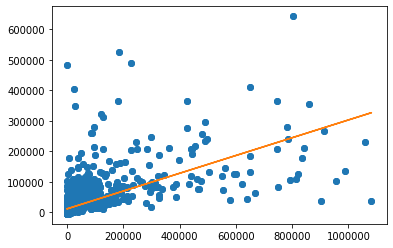

In [1072]:
# y vs. y_hat 그림을 통해 시각화 
# Correlation 계산
plt.scatter(x = tsty, y= lr_pred)
plt.plot(tsty,lr_pred,'o')
m,b = np.polyfit(tsty,lr_pred,1)
plt.plot(tsty, m*tsty+b)
print(np.correlate(tsty, lr_pred))

In [1073]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred,tsty)))
print('MAE:',metrics.mean_absolute_error(tsty, lr_pred))
print('R2:',metrics.r2_score(tsty, lr_pred))

RMSE: 59225.99541688084
MAE: 16427.88005629621
R2: 0.3683440576657073


In [139]:
from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(X=trnx, y=trny)
lr_pred_lasso = model_lasso.predict(X=tstx)
print(lr_pred_lasso)

[5172.42343781 1764.50494253 -355.48015184 ... 4972.14965466 6536.43238666
 2196.01564017]


In [140]:
np.sqrt(np.mean((np.square(lr_pred_lasso - tsty))))

48700.775363126275

In [141]:
print(tsty - lr_pred_lasso)

37277    -5076.423438
17126    -1488.504943
34866      855.480152
18077    39131.195174
14470   -14882.915559
             ...     
3455      -417.260006
20844      952.441805
38571    -3304.149655
14229    -6228.432387
32631    -1211.015640
Name: 재산피해소계, Length: 5239, dtype: float64


[9.24916276e+12]


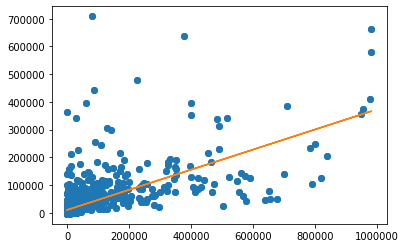

In [142]:
# y vs. y_hat 그림을 통해 시각화 
# Correlation 계산
plt.scatter(x = tsty, y= lr_pred_lasso)
plt.plot(tsty,lr_pred_lasso,'o')
m,b = np.polyfit(tsty,lr_pred_lasso,1)
plt.plot(tsty, m*tsty+b)
print(np.correlate(tsty, lr_pred_lasso))

In [143]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred_lasso,tsty)))
print('MAE:',metrics.mean_absolute_error(tsty, lr_pred_lasso))
print('R2:',metrics.r2_score(tsty, lr_pred_lasso))

RMSE: 48700.775363126275
MAE: 14346.315893428793
R2: 0.42962084853972016


In [144]:
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X=trnx, y=trny)
lr_pred_ridge = model_ridge.predict(X=tstx)
print(lr_pred_ridge)

[5172.54921929 1765.72993772 -339.84451768 ... 4971.29274755 6537.09359607
 2194.16309735]


In [145]:
np.sqrt(np.mean((np.square(lr_pred_ridge - tsty))))

48700.70943444273

In [146]:
print(tsty - lr_pred_ridge)

37277    -5076.549219
17126    -1489.729938
34866      839.844518
18077    39132.358389
14470   -14884.495962
             ...     
3455      -414.167409
20844      954.810906
38571    -3303.292748
14229    -6229.093596
32631    -1209.163097
Name: 재산피해소계, Length: 5239, dtype: float64


[9.2491814e+12]


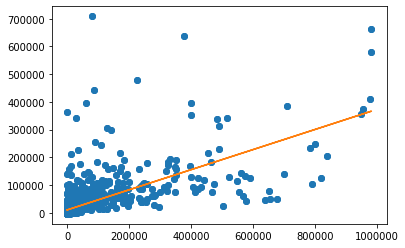

In [147]:
# y vs. y_hat 그림을 통해 시각화 
# Correlation 계산
plt.scatter(x = tsty, y= lr_pred_ridge)
plt.plot(tsty,lr_pred_ridge,'o')
m,b = np.polyfit(tsty,lr_pred_ridge,1)
plt.plot(tsty, m*tsty+b)
print(np.correlate(tsty, lr_pred_ridge))

In [148]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred_ridge,tsty)))
print('MAE:',metrics.mean_absolute_error(tsty, lr_pred_ridge))
print('R2:',metrics.r2_score(tsty, lr_pred_ridge))

RMSE: 48700.709434442724
MAE: 14346.463031175886
R2: 0.42962239284043613


In [149]:
print(model.coef_)
print(model_lasso.coef_)
print(model_ridge.coef_)
#회귀계수

[ 1.68705232e+00  9.94135272e+00  1.34464486e+02  4.44243722e+01
 -3.83755485e+00  8.62385741e+01  4.01105242e+03]
[ 1.68714667e+00  9.94154300e+00  1.34464460e+02  4.44246876e+01
 -3.82335325e+00  7.00908129e+01  4.00069205e+03]
[ 1.68704852e+00  9.94137710e+00  1.34464461e+02  4.44245079e+01
 -3.83128254e+00  8.59314586e+01  4.00785562e+03]
